In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation,Dense,Flatten, BatchNormalization, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import glob
import numpy as np
from sklearn.metrics import classification_report

In [2]:
batch_size = 8
epoch = 30


In [6]:
path ='/content/drive/MyDrive/Train'

img_datagenerator = ImageDataGenerator(validation_split= 0.2,
                                 rescale = 1./255,
                                 rotation_range = 40,
                                 width_shift_range= 0.2,
                                 height_shift_range= 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True,
                                 fill_mode= 'nearest')





In [9]:
train_generator = img_datagenerator.flow_from_directory(path,
                                                  target_size= (70,70),
                                                  batch_size =batch_size,
                                                  color_mode = 'rgb',
                                                  class_mode = 'binary',
                                                  shuffle = True,
                                                  seed = 42,
                                                  subset = 'training')

Found 8015 images belonging to 2 classes.


In [10]:
valid_generator = img_datagenerator.flow_from_directory(path,
                                                  target_size= (70,70),
                                                  batch_size =batch_size,
                                                  color_mode = 'rgb',
                                                  class_mode = 'binary',
                                                  shuffle = True,
                                                  seed = 42,
                                                  subset = 'validation')

Found 2003 images belonging to 2 classes.


In [11]:
model = Sequential([Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding= 'same',input_shape=(70,70,3)),
                    MaxPool2D(pool_size = (2,2), strides=2),
                    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding= 'same'),
                    MaxPool2D(pool_size = (2,2), strides=2),
                    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding= 'same'),
                    MaxPool2D(pool_size = (2,2), strides=2),
                    Flatten(),
                    Dense(units=64,activation='relu'),
                    Dense(units=1,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [12]:
model.compile(optimizer = Adam(learning_rate = 0.0001),loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(train_generator, epochs = epoch, validation_data = valid_generator,batch_size = batch_size )

Epoch 1/30
1002/1002 [==============================] - 1016s 1s/step - loss: 0.2984 - accuracy: 0.8811 - val_loss: 0.2439 - val_accuracy: 0.9101
Epoch 2/30
1002/1002 [==============================] - 105s 105ms/step - loss: 0.2113 - accuracy: 0.9201 - val_loss: 0.1784 - val_accuracy: 0.9331
Epoch 3/30
1002/1002 [==============================] - 107s 106ms/step - loss: 0.1943 - accuracy: 0.9275 - val_loss: 0.1838 - val_accuracy: 0.9261
Epoch 4/30
1002/1002 [==============================] - 104s 104ms/step - loss: 0.1716 - accuracy: 0.9369 - val_loss: 0.1581 - val_accuracy: 0.9371
Epoch 5/30
1002/1002 [==============================] - 107s 106ms/step - loss: 0.1594 - accuracy: 0.9414 - val_loss: 0.1490 - val_accuracy: 0.9481
Epoch 6/30
1002/1002 [==============================] - 104s 104ms/step - loss: 0.1549 - accuracy: 0.9426 - val_loss: 0.1308 - val_accuracy: 0.9516
Epoch 7/30
1002/1002 [==============================] - 106s 106ms/step - loss: 0.1530 - accuracy: 0.9439 - val_lo

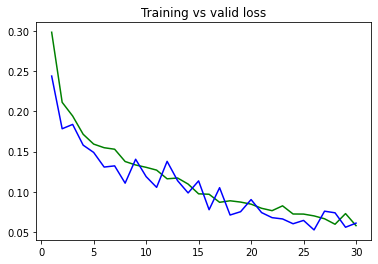

In [14]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epocplot = range(1, epoch+1)
plt.plot(epocplot,loss_train,'g',label = 'Traning loss')
plt.plot(epocplot,loss_val,'b',label = 'Validation loss')
plt.title('Training vs valid loss')

plt.show()

In [15]:
path_var = '/content/drive/MyDrive/Test_1/*'

In [16]:
a = glob.glob(path_var)
a

['/content/drive/MyDrive/Test_1/WithoutMask',
 '/content/drive/MyDrive/Test_1/WithMask']

In [17]:
path_x = '/content/drive/MyDrive/Test_1/WithMask/*'

In [18]:
b = glob.glob(path_x)
b

['/content/drive/MyDrive/Test_1/WithMask/423.png',
 '/content/drive/MyDrive/Test_1/WithMask/392.png',
 '/content/drive/MyDrive/Test_1/WithMask/147.png',
 '/content/drive/MyDrive/Test_1/WithMask/1439.png',
 '/content/drive/MyDrive/Test_1/WithMask/3.png',
 '/content/drive/MyDrive/Test_1/WithMask/45.png',
 '/content/drive/MyDrive/Test_1/WithMask/1413.png',
 '/content/drive/MyDrive/Test_1/WithMask/86.png',
 '/content/drive/MyDrive/Test_1/WithMask/754.png',
 '/content/drive/MyDrive/Test_1/WithMask/Augmented_13_9945827.png',
 '/content/drive/MyDrive/Test_1/WithMask/Augmented_72_4737960.png']

In [19]:
path_y = '/content/drive/MyDrive/Test_1/WithoutMask/*'

In [20]:
c = glob.glob(path_y)
c

['/content/drive/MyDrive/Test_1/WithoutMask/1.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/147.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/1799.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/231.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/346.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/53.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/581.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/90.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/5924.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/608.png']

In [21]:
vari_data=[]

for item in b:
  vari_data.append(item)


In [22]:
for g in c:
  vari_data.append(g)

In [23]:
vari_data

['/content/drive/MyDrive/Test_1/WithMask/423.png',
 '/content/drive/MyDrive/Test_1/WithMask/392.png',
 '/content/drive/MyDrive/Test_1/WithMask/147.png',
 '/content/drive/MyDrive/Test_1/WithMask/1439.png',
 '/content/drive/MyDrive/Test_1/WithMask/3.png',
 '/content/drive/MyDrive/Test_1/WithMask/45.png',
 '/content/drive/MyDrive/Test_1/WithMask/1413.png',
 '/content/drive/MyDrive/Test_1/WithMask/86.png',
 '/content/drive/MyDrive/Test_1/WithMask/754.png',
 '/content/drive/MyDrive/Test_1/WithMask/Augmented_13_9945827.png',
 '/content/drive/MyDrive/Test_1/WithMask/Augmented_72_4737960.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/1.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/147.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/1799.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/231.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/346.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/53.png',
 '/content/drive/MyDrive/Test_1/WithoutMask/581.png',
 '/content/drive/MyDrive/Test_1

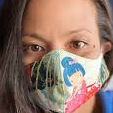



MASK ON. 



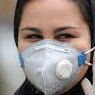



MASK ON. 



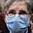



MASK ON. 



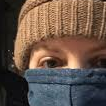



MASK ON. 





MASK ON. 



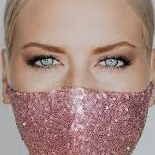



MASK ON. 



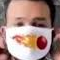



MASK ON. 



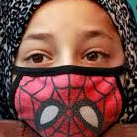



MASK ON. 



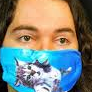



MASK ON. 



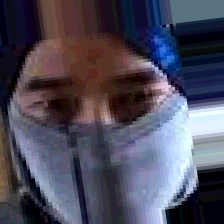



MASK ON. 



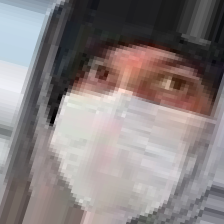



MASK ON. 



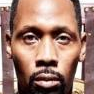



MASK OFF. 



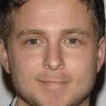



MASK OFF. 



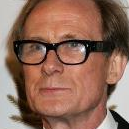



MASK OFF. 



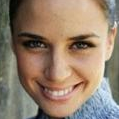



MASK OFF. 



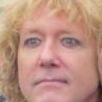



MASK OFF. 



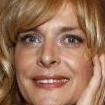



MASK OFF. 



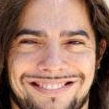



MASK OFF. 



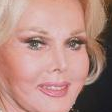



MASK OFF. 



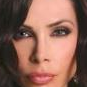



MASK OFF. 



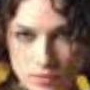



MASK OFF. 



In [24]:
from IPython.display import Image,display
TGREEN = '\033[1;37;42m'
TRED = '\033[1;37;41m'

for i in vari_data:
  img_directory = i
  img_data = image.load_img(img_directory, target_size= (70,70))
  img_data = image.img_to_array(img_data)
  img_data = np.expand_dims(img_data, axis = 0)

  classify = model.predict(img_data)
  display(Image(img_directory,width = 150,height = 150))

  print("\n")

  if(int(classify[0][0]) == 0):
    print(TGREEN + 'MASK ON. \n')
  else:
    print(TRED + 'MASK OFF. \n')


In [25]:
path_2 = '/content/drive/MyDrive/Test_2/*'

In [26]:
t = glob.glob(path_2)
t

['/content/drive/MyDrive/Test_2/WithMask',
 '/content/drive/MyDrive/Test_2/WithoutMask']

In [27]:
t_1 = '/content/drive/MyDrive/Test_2/WithMask/*'

In [28]:
z = glob.glob(t_1)
z

['/content/drive/MyDrive/Test_2/WithMask/Augmented_792_909469.png',
 '/content/drive/MyDrive/Test_2/WithMask/Augmented_798_6343266.png',
 '/content/drive/MyDrive/Test_2/WithMask/Augmented_807_7260691.png',
 '/content/drive/MyDrive/Test_2/WithMask/Augmented_787_5812521.png',
 '/content/drive/MyDrive/Test_2/WithMask/Augmented_890_8528242.png']

In [29]:
t_2 = '/content/drive/MyDrive/Test_2/WithoutMask/*'

In [30]:
o = glob.glob(t_2)
o

['/content/drive/MyDrive/Test_2/WithoutMask/3372.png',
 '/content/drive/MyDrive/Test_2/WithoutMask/3763.png',
 '/content/drive/MyDrive/Test_2/WithoutMask/4027.png',
 '/content/drive/MyDrive/Test_2/WithoutMask/4794.png',
 '/content/drive/MyDrive/Test_2/WithoutMask/5463.png']

In [31]:
test_2 = []

for item in z:
  test_2.append(item)

In [32]:
for g in o:
  test_2.append(g)

In [33]:
test_2

['/content/drive/MyDrive/Test_2/WithMask/Augmented_792_909469.png',
 '/content/drive/MyDrive/Test_2/WithMask/Augmented_798_6343266.png',
 '/content/drive/MyDrive/Test_2/WithMask/Augmented_807_7260691.png',
 '/content/drive/MyDrive/Test_2/WithMask/Augmented_787_5812521.png',
 '/content/drive/MyDrive/Test_2/WithMask/Augmented_890_8528242.png',
 '/content/drive/MyDrive/Test_2/WithoutMask/3372.png',
 '/content/drive/MyDrive/Test_2/WithoutMask/3763.png',
 '/content/drive/MyDrive/Test_2/WithoutMask/4027.png',
 '/content/drive/MyDrive/Test_2/WithoutMask/4794.png',
 '/content/drive/MyDrive/Test_2/WithoutMask/5463.png']

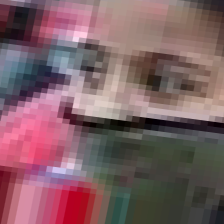



MASK ON. 



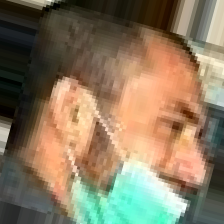



MASK ON. 



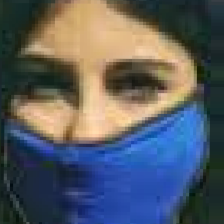



MASK ON. 



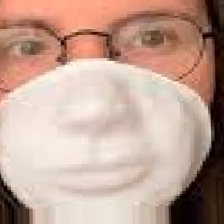



MASK ON. 



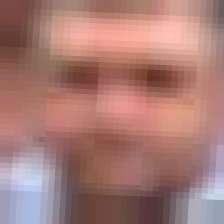



MASK OFF. 



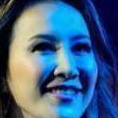



MASK ON. 



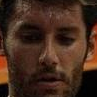



MASK OFF. 



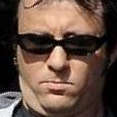



MASK OFF. 



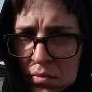



MASK OFF. 



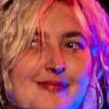



MASK OFF. 



In [34]:
from IPython.display import Image,display
TGREEN = '\033[1;37;42m'
TRED = '\033[1;37;41m'

for i in test_2:
  img_directory = i
  img_data = image.load_img(img_directory, target_size= (70,70))
  img_data = image.img_to_array(img_data)
  img_data = np.expand_dims(img_data, axis = 0)

  classify = model.predict(img_data)
  display(Image(img_directory,width = 150,height = 150))

  print("\n")

  if(int(classify[0][0]) == 0):
    print(TGREEN + 'MASK ON. \n')
  else:
    print(TRED + 'MASK OFF. \n')